In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import re
import json
from matplotlib.legend_handler import HandlerLine2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
#dev result path
pathcongater = "/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/IRDebias/coderdebiasinf/results/dev/"
path_coder = "/mnt/c/users/cornelia/documents/AI/MasterThesis/IRDebias/GithubRepos/coder/Experiments/"
eval_query_ids = "/mnt/c/users/cornelia/documents/AI/MasterThesis/IRDebias/GithubRepos/coder/Experiments/data/msmarco_passage.dev.fair.tsv"
collection = os.path.join(path_coder, "data/collection.tsv")
collection_neutralityscores = os.path.join(path_coder, "data/collection_neutralityscores.tsv")
collection_qrels = os.path.join(path_coder, "data/qrels.dev.tsv")
con_pred = os.path.join(pathcongater, "congater/Congater_dev_numlayers2_2023-09-18_15-04-27_w1J/predictions")
ft_pred = os.path.join(path_coder, "CV_Server/CV_Anserini_TasB_2023-10-14_11-46-06_hWu_reg20/predictions")
#qrels.dev

In [3]:
queries = pd.read_table(eval_query_ids, header=None,names=["ID","query"])
queries.head()

,ID,query
0,361240,how to get big thighs and hips
1,1056160,what is early childhood studies
2,682958,what is a feature of grey matter
3,900926,what temp do you cook pork to
4,160460,do you have to pay to get papers notarized?


In [4]:
documents = pd.read_table(collection, header=None, names=["docid","doc"])
documents

,docid,doc
0,0,The presence of communication amid scientific ...
1,1,The Manhattan Project and its atomic bomb help...
2,2,Essay on The Manhattan Project - The Manhattan...
3,3,The Manhattan Project was the name for a proje...
4,4,versions of each volume as well as complementa...
...,...,...
8841818,8841818,When metal salts emit short wavelengths of vis...
8841819,8841819,Thousands of people across the United States w...
8841820,8841820,"The recipe that creates blue, for example, inc..."
8841821,8841821,"On Independence Days of yore, old-timey crowds..."


In [27]:
documents_neutrality = pd.read_table(collection_neutralityscores, header=None, names=["docid","score"])
documents_neutrality

,docid,score
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
8841818,8841818,1.0
8841819,8841819,1.0
8841820,8841820,1.0
8841821,8841821,1.0


In [17]:
documents_qrels = pd.read_table(collection_qrels, header=None, names=["qid","Q1","docid","Q2"])
documents_qrels

,qid,Q1,docid,Q2
0,1102432,0,2026790,1
1,1102431,0,7066866,1
2,1102431,0,7066867,1
3,1090282,0,7066900,1
4,39449,0,7066905,1
...,...,...,...,...
59268,150337,0,8009410,1
59269,22241,0,8009429,1
59270,129177,0,8009442,1
59271,190655,0,3576091,1


In [6]:
documents_neutrality[documents_neutrality['docid']==2773207]
documents[documents['docid']==2773207]

,docid,doc
2773207,2773207,A healthy body fat percentage ranges from 10 t...


In [7]:
os.listdir(con_pred)

['gender',
 'reranked_w=0.1_bm25.top1000.dev.tsv',
 'reranked_w=0.2_bm25.top1000.dev.tsv',
 'reranked_w=0.3_bm25.top1000.dev.tsv',
 'reranked_w=0.4_bm25.top1000.dev.tsv',
 'reranked_w=0.5_bm25.top1000.dev.tsv',
 'reranked_w=0.6_bm25.top1000.dev.tsv',
 'reranked_w=0.7_bm25.top1000.dev.tsv',
 'reranked_w=0.8_bm25.top1000.dev.tsv',
 'reranked_w=0.9_bm25.top1000.dev.tsv',
 'reranked_w=0_bm25.top1000.dev.tsv',
 'reranked_w=1_bm25.top1000.dev.tsv',
 'task']

In [8]:
os.listdir(ft_pred)

['best.ranked.dev.tsv', 'training_session_records.xls']

In [54]:
def get_top_pred(pred_file, query_txt,top_n):
    w0_pred = pd.read_table(pred_file, header=None, names=["queryid","docid","rank","score"])
    id = queries[queries["query"] == query_txt]['ID'].values[0]
    qrels_q = documents_qrels[documents_qrels["qid"]==id]
    print(qrels_q)
    first_10docs = w0_pred[w0_pred['queryid']==id].sort_values(by=['rank']).iloc[:top_n]#["docid"].values
    return first_10docs.merge(documents_neutrality, on = "docid").merge(documents, on = "docid").merge(qrels_q,on="docid", how = 'left').sort_values(by = ['qid'])

In [10]:
def get_docrank(pred_file, query_txt, docid):
    w0_pred = pd.read_table(pred_file, header=None, names=["queryid","docid","rank","score"])
    id = queries[queries["query"] == query_txt]['ID'].values[0]
    return w0_pred[(w0_pred['queryid']==id) & (w0_pred['docid']==docid)]["rank"].values

In [11]:
pd.set_option('max_colwidth', 1000)

In [61]:
#query_txt = "how long is a president's term in office"
query_txt = "what is poetic justice"
file_ = os.path.join(con_pred,"reranked_w=0_bm25.top1000.dev.tsv")
print(get_docrank(file_, query_txt, 3973766))
get_top_pred(file_, query_txt, 1000)

[]
          qid  Q1    docid  Q2
48820  784873   0  7837445   1


,queryid,docid,rank,score_x,score_y,doc,qid,Q1,Q2
1,784873,7837445,2,103.393280,1.0,"Poetic justice (disambiguation) Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, without being the first a logic causation of the last. This disambiguation page lists articles associated with the title Poetic justice.",784873.0,0.0,1.0
0,784873,4368817,1,103.846150,0.0,"Poetic justice (disambiguation) Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, without being the first a logic causation of the last. Poetic justice may also refer to: Poetic Justice (film), a 1993 film written and directed by John Singleton and starring Janet Jackson, Tupac Shakur, Regina King, and Joe Torry.",NaN,NaN,NaN
2,784873,7837450,3,103.235940,1.0,"Poetic justice (disambiguation) Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, without being the first a logic causation of the last. Poetic justice may also refer to:",NaN,NaN,NaN
3,784873,7837451,4,102.875656,1.0,"(Redirected from Poetic Justice) Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, without being the first a logic causation of the last. Poetic justice may also refer to:",NaN,NaN,NaN
4,784873,8591355,5,102.743490,1.0,"Poetic Justice Definition In literature, poetic justice is an ideal form of justice, in which the good characters are rewarded and the bad characters are punished, by an ironic twist of fate. It is a strong literary view that all forms of literature must convey moral lessons.",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,784873,6991391,996,75.896970,1.0,"the two houses of congress may try to override the presidents veto by what vote in each house, very few bills passed this way. 2/3 the courts ( ----- ) then interpret it and administer justice under it.",NaN,NaN,NaN
996,784873,3093545,997,75.367040,1.0,"What are the security clearance levels? Security clearances can be issued by many United States Government agencies, including the Department of Defense (DoD), the Department of Homeland Security, the Department of Energy (DoE), the Department of Justice, and the Central Intelligence Agency.",NaN,NaN,NaN
997,784873,3912027,998,75.100950,1.0,"What is the president's cabinet? The president's cabinet is made up of 15 Secretaries of the various departments of the federal government (State Department, Department of Commerce, Defense Department, et â¦ c) plus the Attorney General who heads Justice.",NaN,NaN,NaN
998,784873,4525591,999,73.582910,1.0,"What eventually became Verizon was founded as Bell Atlantic, which was one of the seven Baby Bells that were formed after AT&T Corporation was forced to relinquish its control of the Bell System by order of the Justice Department of the United States.",NaN,NaN,NaN


In [62]:
file_ = os.path.join(con_pred,"reranked_w=0.7_bm25.top1000.dev.tsv")
print(get_docrank(file_, query_txt, 3973766))
get_top_pred(file_,query_txt, 100)

[]
          qid  Q1    docid  Q2
48820  784873   0  7837445   1


,queryid,docid,rank,score_x,score_y,doc,qid,Q1,Q2
0,784873,7837445,1,27.636265,1.0,"Poetic justice (disambiguation) Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, without being the first a logic causation of the last. This disambiguation page lists articles associated with the title Poetic justice.",784873.0,0.0,1.0
1,784873,7837450,2,27.602493,1.0,"Poetic justice (disambiguation) Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, without being the first a logic causation of the last. Poetic justice may also refer to:",NaN,NaN,NaN
2,784873,8591355,3,27.588228,1.0,"Poetic Justice Definition In literature, poetic justice is an ideal form of justice, in which the good characters are rewarded and the bad characters are punished, by an ironic twist of fate. It is a strong literary view that all forms of literature must convey moral lessons.",NaN,NaN,NaN
3,784873,7837451,4,27.547726,1.0,"(Redirected from Poetic Justice) Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, without being the first a logic causation of the last. Poetic justice may also refer to:",NaN,NaN,NaN
4,784873,6606682,5,27.508598,1.0,"poetic justice(Noun) The rewarding of virtue, and the punishment of vice, especially in an ironic manner. Poetic justice. Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, often in modern literature by an ironic twist of fate intimately related to the character's own conduct.",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,784873,682566,96,25.368752,1.0,"the art of rhythmical composition, written or spoken, for exciting pleasure by beautiful, imaginative, or elevated thoughts. literary work in metrical form; verse. prose with poetic qualities. poetic qualities however manifested: the poetry of simple acts and things.",NaN,NaN,NaN
96,784873,276656,97,25.365988,1.0,The definition of injustice is something that is not fair or just. An example of injustice is when an innocent person is sent to jail for a crime he did not commit. injustice. injustice. Violation of another's rights or of what is right; lack of justice.,NaN,NaN,NaN
97,784873,100617,98,25.360813,1.0,(October 2013) A justice ministry is a ministry or other government agency charged with justice. The ministry is often headed by a minister for justice or secretary of justice or secretary for justice; sometimes the head of a department of justice is entitled attorney general.,NaN,NaN,NaN
98,784873,4817359,99,25.358149,1.0,"Social justice. Any solution to a criminal justice case needs to include the concept of social justice. Social justice considers a broader concept of justice than the criminal justice. Issues of sexism, racism and inequality are also part of the concern of social justice.",NaN,NaN,NaN


In [63]:
file_ = os.path.join(con_pred,"reranked_w=1_bm25.top1000.dev.tsv")
print(get_docrank(file_, query_txt, 3973766))
get_top_pred(file_,query_txt, 1000)

[]
          qid  Q1    docid  Q2
48820  784873   0  7837445   1


,queryid,docid,rank,score_x,score_y,doc,qid,Q1,Q2
0,784873,7837445,1,5.835522,1.0,"Poetic justice (disambiguation) Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, without being the first a logic causation of the last. This disambiguation page lists articles associated with the title Poetic justice.",784873.0,0.0,1.0
1,784873,7837450,2,5.827502,1.0,"Poetic justice (disambiguation) Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, without being the first a logic causation of the last. Poetic justice may also refer to:",NaN,NaN,NaN
2,784873,7837451,3,5.825411,1.0,"(Redirected from Poetic Justice) Poetic justice is a literary device in which virtue is ultimately rewarded or vice punished, without being the first a logic causation of the last. Poetic justice may also refer to:",NaN,NaN,NaN
3,784873,8591355,4,5.824756,1.0,"Poetic Justice Definition In literature, poetic justice is an ideal form of justice, in which the good characters are rewarded and the bad characters are punished, by an ironic twist of fate. It is a strong literary view that all forms of literature must convey moral lessons.",NaN,NaN,NaN
4,784873,4368815,5,5.806434,1.0,Definition of poetic justice. : an outcome in which vice is punished and virtue rewarded usually in a manner peculiarly or ironically appropriate.,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,784873,2806673,996,4.754105,1.0,Wilfred Owen was educated at the Birkenhead Institute and at Shrewsbury Technical School (later known as the Wakeman School). Owen discovered his poetic vocation in about 1904 during a holiday spent in Cheshire.,NaN,NaN,NaN
996,784873,2505204,997,4.728359,0.0,"Hilary Holladay's book of poems The Dreams of Mary Rowlandson (Loom Press, 2006) recreates her capture by Indians in poetic vignettes, using epigraphs from Rowlandson's own narrative in addition.",NaN,NaN,NaN
997,784873,8651366,998,4.717856,0.0,"John Hart lived in Hopewell Township, in what is now the town of Hopewell, which was then known locally as Baptist Meeting House, for the church there. He was the son of Edward Hart, a Justice of the Peace, public assessor, and farmer.",NaN,NaN,NaN
998,784873,7838982,999,4.704933,0.0,"Chris's first roommate in Nashville, Monroe Jones, helped put together Chris's first song demos, produced his first indie project in 1993, and has produced all of Chris's recordings ever since, including What A Heart Is Beating For, Chris's sixth studio record.rooner Rice shows up in the Sinatra-esque Here Come Those Eyes.. Let The Words Escape is a borrowing and retooling of lines from Elizabeth Barrett Browning sonnets that Chris weaves into a beautifully moving and poetic love song.",NaN,NaN,NaN


In [23]:
omega = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for w in omega:
    file_ = os.path.join(con_pred,f"reranked_w={w}_bm25.top1000.dev.tsv")
    print(get_docrank(file_, query_txt, 236231))

[6]
[6]
[7]
[7]
[6]
[5]
[4]
[4]
[4]
[10]
[49]


### Follow bad answer over omega

In [12]:
#get_top_pred(os.path.join(ft_pred,"best.ranked.dev.tsv"), 10) 

### get max difference queries

In [25]:
pd.set_option('display.max_rows', 500)

In [29]:
w0_pred = pd.read_table(os.path.join(con_pred,"reranked_w=0_bm25.top1000.dev.tsv"), header=None, names=["queryid","docid","rank","score"])
w1_pred = pd.read_table(os.path.join(con_pred,"reranked_w=1_bm25.top1000.dev.tsv"), header=None, names=["queryid","docid","rank","score"])
w0_pred = w0_pred[w0_pred["rank"] <= 20].join(documents_neutrality, on = "docid", how = 'left',lsuffix = '_w')
w1_pred = w1_pred[w1_pred["rank"] <= 20].join(documents_neutrality, on = "docid", how = 'left',lsuffix = '_w')
w0_pred = w0_pred[["queryid","score"]].groupby("queryid").mean()
w1_pred = w1_pred[["queryid","score"]].groupby("queryid").mean()
w_pred_joined = w0_pred.merge(w1_pred, on = ["queryid"], how="left")#.groupby("queryid").count()
w_pred_joined["diff"] = w_pred_joined["score_y"] - w_pred_joined["score_x"]
w_pred_joined.merge(queries, left_on = "queryid", right_on = "ID").sort_values("diff", ascending=False).head(n=120)
#w_pred_joined

,score_x,score_y,diff,ID,query
199,0.439286,1.000000,0.560714,1094303,iq scores are measured with a test designed so that the mean is
214,0.602273,0.975000,0.372727,1102331,why do people flirt
69,0.600000,0.950000,0.350000,454339,minimum calories daily
14,0.650000,1.000000,0.350000,74595,can the us president be reelected after two year
127,0.691961,1.000000,0.308039,855384,what is theme of pygmalion
10,0.700000,1.000000,0.300000,68609,can i claim the standard deduction if my parents don't claim me as dependent
70,0.700000,1.000000,0.300000,461718,name of kind of dr that looks at spines
61,0.700000,1.000000,0.300000,399404,is a baby's facial features determined from conception
186,0.700000,1.000000,0.300000,1087303,what are some athletics in germany
144,0.600000,0.900000,0.300000,1005583,when do babies pick up stuff


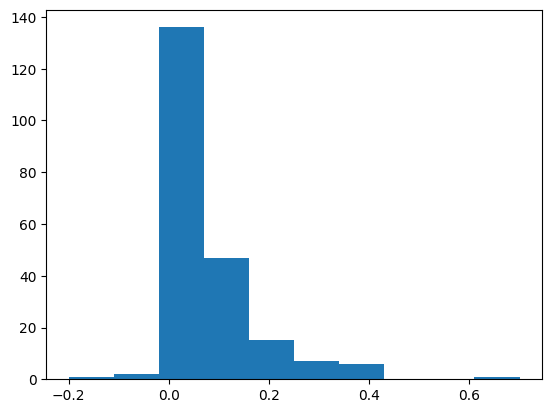

In [78]:
plt.hist(w_pred_joined["diff"])
plt.show() 

In [12]:
w0_pred = pd.read_table(os.path.join(con_pred,"reranked_w=0_bm25.top1000.dev.tsv"), header=None, names=["queryid","docid","rank","score"])
w1_pred = pd.read_table(os.path.join(con_pred,"reranked_w=1_bm25.top1000.dev.tsv"), header=None, names=["queryid","docid","rank","score"])
w0_pred = w0_pred[w0_pred["rank"] <= 10].join(documents_neutrality, on = "docid", how = 'left',lsuffix = '_w')
w0_pred[(w0_pred['rank']<2) & (w0_pred['score']<1)].merge(queries, left_on = "queryid", right_on = "ID").head(n=100)

,queryid,docid_w,rank,score_w,docid,score,ID,query
0,579358,2773207,1,100.630810,2773207,0.000000,579358,what body fat percentage is healthy
1,842362,4516419,1,100.326690,4516419,0.000000,842362,what is the purpose of dna replication
2,62741,7466312,1,97.618430,7466312,0.666667,62741,can a month old sit up?
3,381065,813060,1,98.166510,813060,0.000000,381065,how to start baby on whole.milk
4,461718,4230720,1,94.026660,4230720,0.000000,461718,name of kind of dr that looks at spines
5,1083283,7138952,1,98.821270,7138952,0.000000,1083283,what does paternalism do
6,69779,7350549,1,98.869690,7350549,0.000000,69779,can i take out two insurance policies on my car
7,1069094,516181,1,99.194220,516181,0.000000,1069094,why is a baby rh positive
8,873207,7645146,1,102.153534,7645146,0.000000,873207,what length necklace should i wear
9,236278,5925347,1,98.416360,5925347,0.000000,236278,how is back pay for disability determined
